In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [3]:
def newton(f, x):
    h = 1.0E-6
    iteration = 0
    while 1:
        iteration += 1
        x = x - df(f,x,h) / d2f(f,x,h)
        if np.abs(df(f,x,h)) < 1.0E-5: break
    return [x, iteration]

In [4]:
def golden(f, xl, xr):
    d = xr - xl;
    r = (np.sqrt(5) - 1.0) / 2.0
    x1 = xl + r*d
    x2 = xr - r*d
    iteration = 0
    while 1:
        iteration += 1
        if f(x1) < f(x2):
            xl = x2
            x2 = x1
            d = xr - xl
            x1 = xl + r*d
        else:
            xr = x1
            x1 = x2
            d = xr - xl
            x2 = xr - r*d
        if np.abs(d) < 1.0E-5: break
    # returning the optimal point
    return [(x1 + x2) / 2, iteration]

In [5]:
def quadratic(f, x):
    # x: [x0, x1, x2]
    h = 1.0E-6
    iteration = 0
    x3arr = np.array([])
    while 1:
        iteration += 1
        n1 = f(x[0])*(x[1]**2 - x[2]**2)
        n2 = f(x[1])*(x[2]**2 - x[0]**2)
        n3 = f(x[2])*(x[0]**2 - x[1]**2)
        d1 = 2*f(x[0])*(x[1]-x[2])
        d2 = 2*f(x[1])*(x[2]-x[0])
        d3 = 2*f(x[2])*(x[0]-x[1])
        x3 = (n1+n2+n3)/(d1+d2+d3) 
        x3arr = np.append(x3arr, x3)
        if np.abs(df(f, x3, h))<1.0E-5:
            xOpt = x3
            break
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x3
    return [xOpt, iteration, x3arr]

In [6]:
# constants
epsilon = 0.997
sigma = 3.40
rp = np.linspace(2, 6, 100)

In [7]:
# function
f = lambda x: 4*epsilon*(((sigma/x)**12) - ((sigma/x)**6))
df = lambda f, x, h: (f(x+h) - f(x-h)) / (2*h)
d2f = lambda f, x, h: (f(x+h) - 2*f(x) + f(x-h)) / (h**2)

In [8]:
r0 = 0.5
phiNewton = newton(f, r0)
phiGolden = golden(f, 1.0, 6.0)
phiQuad = quadratic(f, [-1.0, 2.0, 3.0])


In [9]:
# checking to see if the r results in the correct minimum value
print(f(phiNewton[0]))
print(f(phiGolden[0]))
print(f(phiQuad[0]))

-0.9969999999999996
-0.99699999999821
-0.9969999999999907


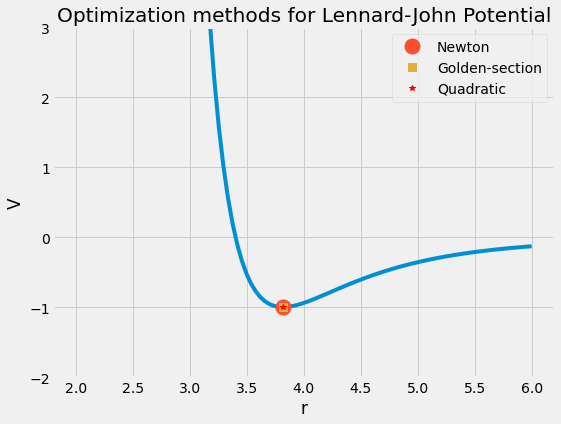

In [10]:
fig = plt.figure(1, figsize = (8,6)); plt.clf(); ax = fig.add_subplot(111);
ax.plot(rp, f(rp))
ax.set_ylim(-2.0, 3.0)
ax.plot(phiNewton[0], f(phiNewton[0]), 'o', markersize = "15", label = "Newton")
ax.plot(phiGolden[0], f(phiGolden[0]), 's', markersize = "8", label = "Golden-section")
ax.plot(phiQuad[0], f(phiQuad[0]), '*r', markersize = '6', label = "Quadratic")
ax.set_xlabel("r")
ax.set_ylabel("V")
ax.set_title("Optimization methods for Lennard-John Potential")
ax.legend()

Text(0, 0.5, 'x3')

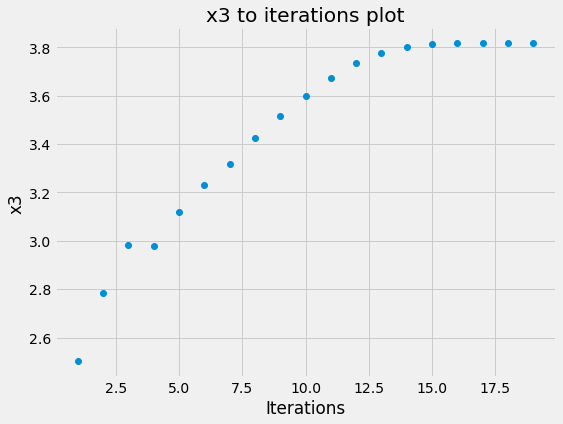

In [14]:
fig = plt.figure(12, figsize = (8,6)); plt.clf(); ax1 = fig.add_subplot(111);
arrIter = np.linspace(1, phiQuad[1], phiQuad[1])
ax1.plot(arrIter, phiQuad[2], 'o')
ax1.set_title("x3 to iterations plot")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("x3")

In [18]:
print("The optimal r position using the newton method is:", phiNewton[0], "calculated in", phiNewton[1], "iterations")
print("The optimal r position using the golden-section method is:", phiGolden[0], "calculated in", phiGolden[1], "iterations")
print("The optimal r position using the golden-section method is:", phiQuad[0], "calculated in", phiQuad[1], "iterations")

The optimal r position using the newton method is: 3.816370950059869 calculated in 32 iterations
The optimal r position using the golden-section method is: 3.816371816547923 calculated in 28 iterations
The optimal r position using the golden-section method is: 3.8163709032644535 calculated in 19 iterations
